In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

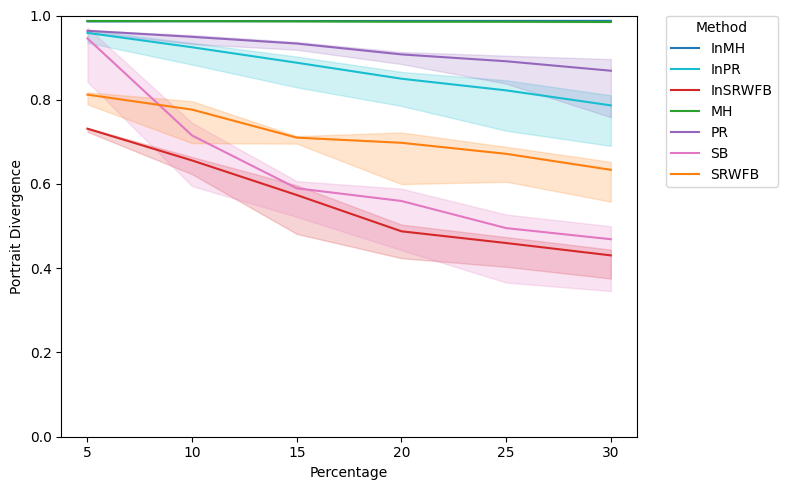

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import os

input_dir = "./"

person_id = "pt01"

input_file = "target.xlsx"
output_file = person_id + ".pdf"

data = pd.read_excel(os.path.join(input_dir,person_id, input_file))

data_long = pd.melt(
    data,
    id_vars=['Method', 'Percent'],
    value_vars=['rep1', 'rep2', 'rep3', 'rep4', 'rep5'],
    var_name='Replicate',
    value_name='Value'
)
custom_color_dict = {
    'InMH': '#1f77b4',
    'InPR': '#17becf',
    'InSRWFB': '#d62728',
    'MH': '#2ca02c',
    'PR': '#9467bd',
    'SRWFB': '#ff7f0e',
    'SB': '#e377c2',
    'RNS': '#7f7f7f'
}

plt.figure(figsize=(8, 5))

methods = data_long['Method'].unique()
for method in methods:
    method_data = data_long[data_long['Method'] == method]
    grouped = method_data.groupby('Percent')['Value']

    mean_values = grouped.mean()
    min_values = grouped.min()
    max_values = grouped.max()

    color = custom_color_dict.get(method, default_color)

    plt.plot(mean_values.index, mean_values, label=method, color=color)
    plt.fill_between(mean_values.index, min_values, max_values, color=color, alpha=0.2)

plt.xlabel('Percentage')
plt.ylabel('Portrait Divergence')
#plt.title('Average with min and max')
plt.ylim(0, 1)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()

plt.savefig(os.path.join(input_dir,person_id, output_file), format='pdf', bbox_inches='tight')
plt.show()


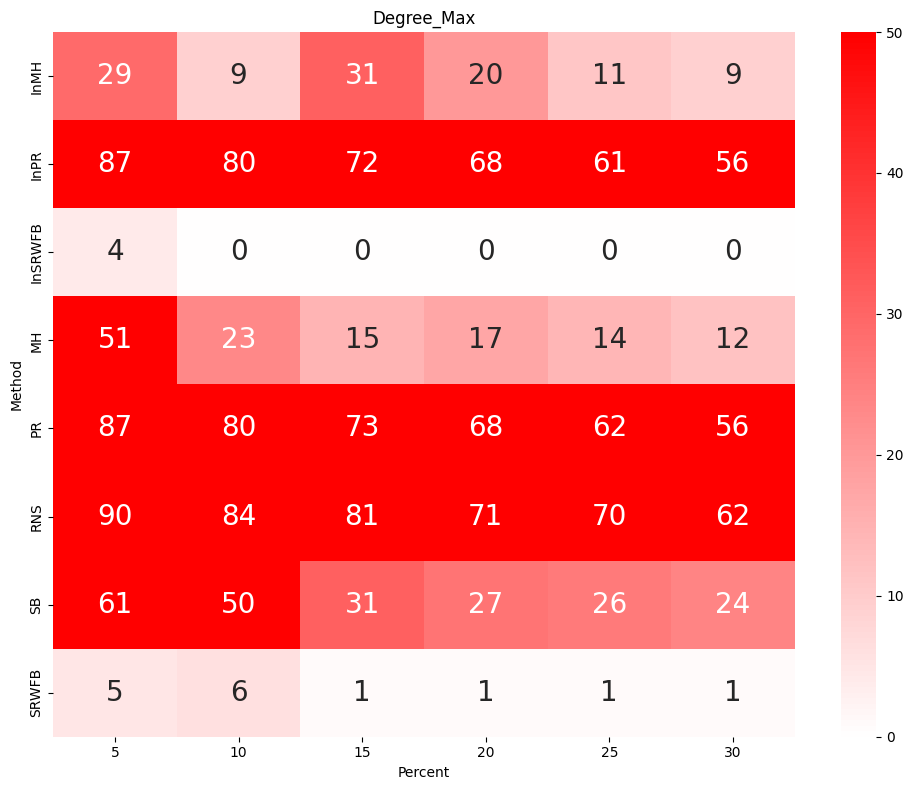

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
# read in excel file
df = pd.read_excel("target.xlsx")  #


# convert to heatmap format
heatmap_data = df.pivot(index='method', columns='percent', values='Degree_Max')

# use diverging colormap
cmap = LinearSegmentedColormap.from_list("red_white_red", ["red", "white", "red"], N=256)

# 
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, 
            annot=True, 
            #fmt=".3f", 
            fmt=".0f", 
            cmap=cmap, 
            center=0,
            vmin= 0,  # 
            #vmax=200, # for abundanced-based
            vmax=50, # for clone-based
            annot_kws={"size": 20} )  # 
plt.title("Degree_Max")
plt.ylabel("Method")
plt.xlabel("Percent")
plt.tight_layout()

plt.savefig("/Users/awu10/Desktop/TCR_Subsampling/Result_Wu/SubNetwork/Baseline/Unique/144525-10-Subsampling/Degree_Max_diff_Direct.pdf", format="pdf", bbox_inches="tight")
#plt.savefig("/Users/awu10/Desktop/TCR_Subsampling/Result_Wu/SubNetwork/Baseline/Unique/144525-10-Subsampling/Degree_Max_diff_Comb.pdf", format="pdf", bbox_inches="tight")


#plt.savefig("/Users/awu10/Desktop/TCR_Subsampling/Result_Wu/SubNetwork/Baseline/Abundance/144525-10_Abundance-Subsampling/Degree_Max_diff_Direct.pdf", format="pdf", bbox_inches="tight")
#plt.savefig("/Users/awu10/Desktop/TCR_Subsampling/Result_Wu/SubNetwork/Baseline/Abundance/144525-10_Abundance-Subsampling/Degree_Max_diff_Comb.pdf", format="pdf", bbox_inches="tight")

plt.show()

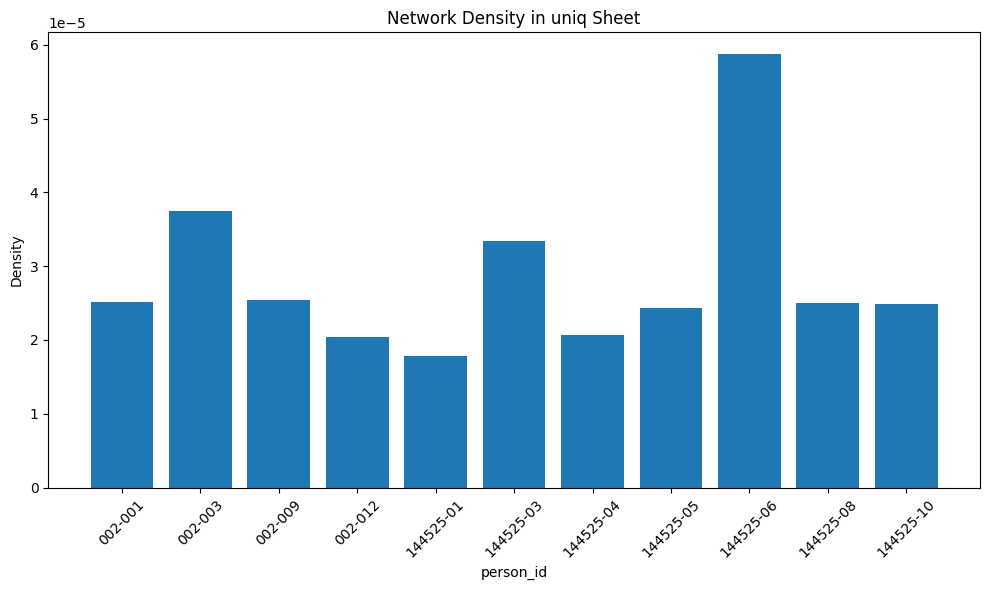

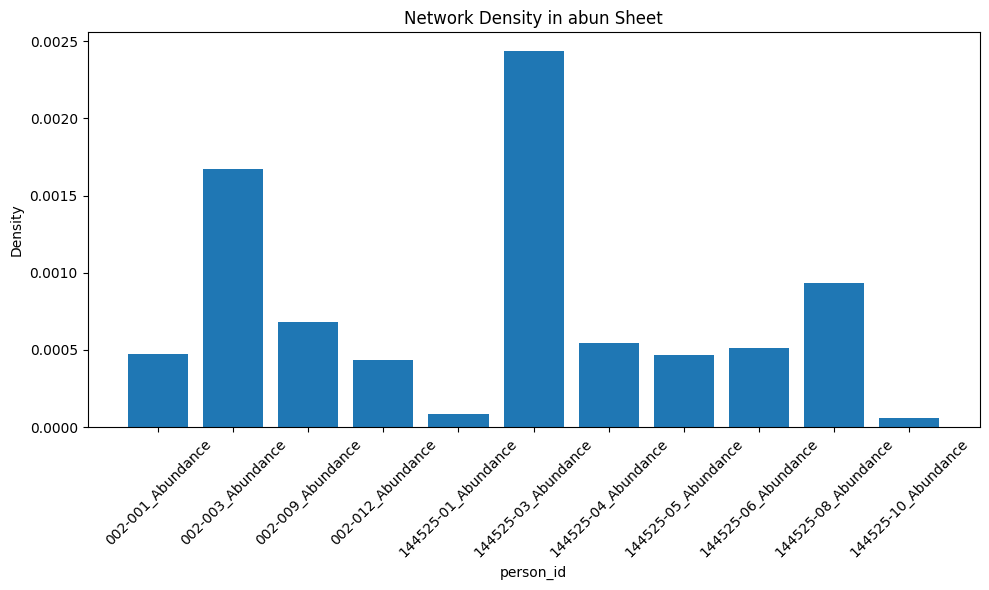

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

dir_path = "./"  # 
file_path = os.path.join(dir_path, "target.xlsx")  #

sheets = ["uniq", "abun"]

for sheet_name in sheets:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    # 
    if "person_id" not in df.columns or "Density" not in df.columns:
        print(f"Sheet {sheet_name} no target column")
        continue

    # bar
    plt.figure(figsize=(10, 6))
    plt.bar(df["person_id"].astype(str), df["Density"])
    plt.xlabel("person_id")
    plt.ylabel("Density")
    plt.title(f"Network Density in {sheet_name} Sheet")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
